In [1]:
import numpy as np
import mglearn
import warnings
warnings.filterwarnings("ignore", category=Warning)

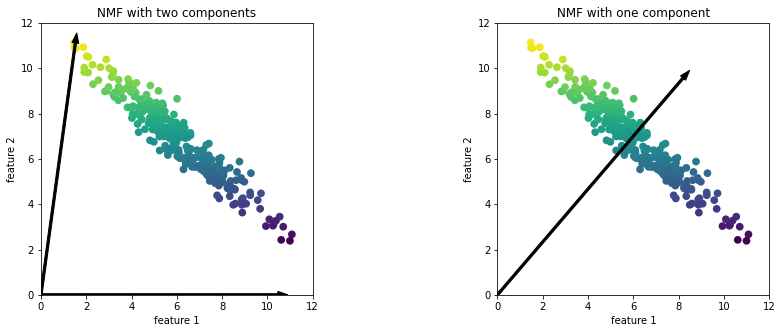

In [2]:
mglearn.plots.plot_nmf_illustration()

In [3]:
import matplotlib.pyplot as plt

In [4]:
S = mglearn.datasets.make_signals()

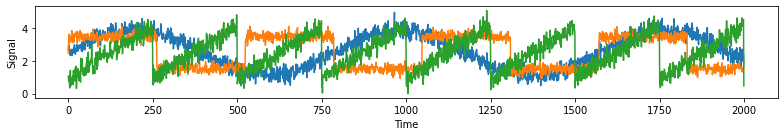

In [5]:
plt.figure(figsize=(11, 2))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")
plt.tight_layout()

In [6]:
A = np.random.RandomState(0).uniform(size=(100, 3))

In [7]:
X = np.dot(S, A.T)

In [8]:
X.shape

(2000, 100)

In [9]:
from sklearn.decomposition import NMF

In [10]:
nmf = NMF(n_components=3, random_state=42)

In [11]:
S_ = nmf.fit_transform(X)

In [12]:
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [13]:
S.shape

(2000, 3)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=3)

In [16]:
H = pca.fit_transform(X)

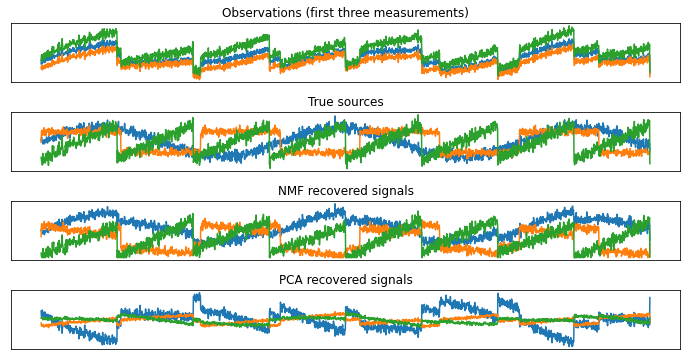

In [17]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(12, 6), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

In [18]:
from sklearn.datasets import load_digits

In [19]:
digits = load_digits()

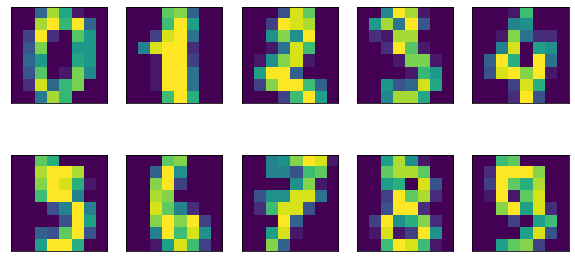

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [21]:
pca = PCA(n_components=2)
pca.fit(digits.data)

PCA(n_components=2)

In [22]:
digits_pca = pca.transform(digits.data)

Text(0, 0.5, 'Second principal component')

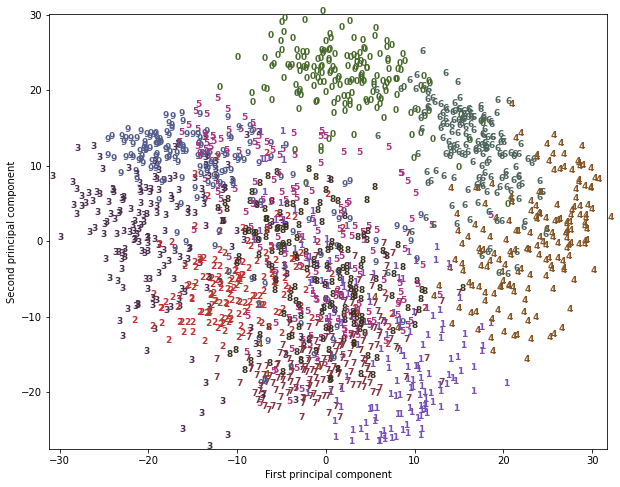

In [23]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 8))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 将数据实际绘制成文本，而不是散点
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [24]:
from sklearn.manifold import TSNE

In [25]:
tsne = TSNE(random_state=42)

In [26]:
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

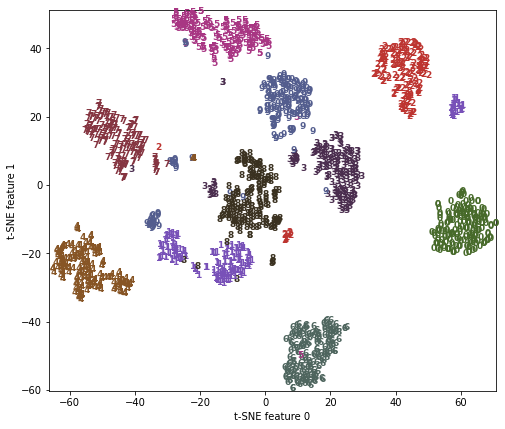

In [27]:
plt.figure(figsize=(8, 7))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 将数据实际绘制成文本，而不是散点
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")